# CLASS 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["cabin_null"]=np.where(df["Cabin"].isnull(),1,0)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
df=pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [11]:
median=df["Age"].median()

In [12]:
impute_nan(df,"Age",median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [15]:
print(df["Age"].std())
print(df["Age_median"].std())

14.526497332334044
13.019696550973194


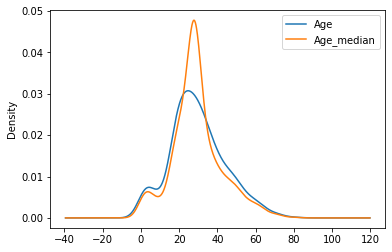

In [19]:
fig=plt.figure()
df["Age"].plot(kind="kde",legend=True)
df["Age_median"].plot(kind="kde",legend=True)

###CLASS 2

In [21]:
df=pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [25]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
df["Age"].isnull().sum()

177

In [31]:
def impute_miss(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [32]:
median=df["Age"].median()

In [33]:
impute_miss(df,"Age",median)

In [34]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


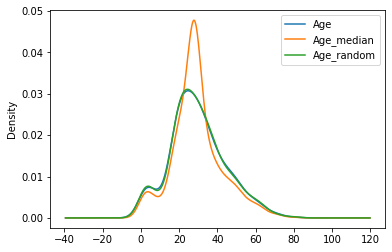

In [38]:
fig=plt.figure()
df["Age"].plot(kind="kde",legend=True)
df["Age_median"].plot(kind="kde",legend=True)
df["Age_random"].plot(kind="kde",legend=True)

In [40]:
print(df["Age"].std())
print(df["Age_median"].std())
print(df["Age_random"].std())

14.526497332334044
13.019696550973194
14.5636540895687


In [41]:
df=pd.read_csv('titanic_train.csv',usecols=["Age","Fare",'Survived'])
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [42]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [43]:
df["Age"].median()

28.0

In [44]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [46]:
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [47]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [49]:
df=pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


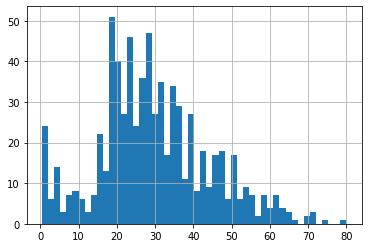

In [50]:
df["Age"].hist(bins=50)

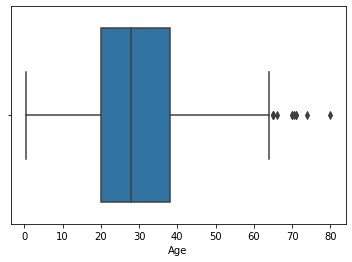

In [51]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [53]:
extreme=df["Age"].mean()+3*df["Age"].std()

In [54]:
 def impute_missing(df,variable,median,extreme):
        df[variable+"_end_dist"]=df[variable].fillna(extreme)
        df[variable].fillna(median,inplace=True)

In [55]:
impute_missing(df,"Age",df["Age"].median(),extreme)

In [56]:
df.head()

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


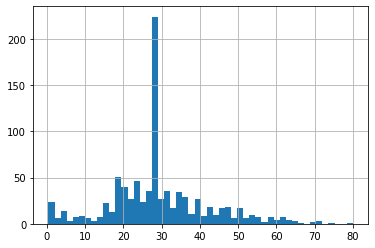

In [58]:
df["Age"].hist(bins=50)

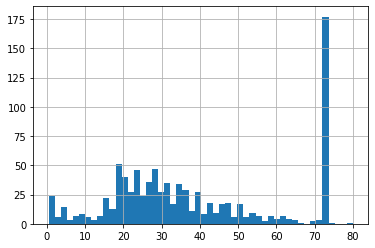

In [59]:
df["Age_end_dist"].hist(bins=50)

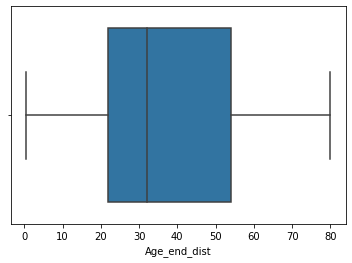

In [60]:
sns.boxplot("Age_end_dist",data=df)

###Class 3

In [2]:
df=pd.read_csv("titanic_train.csv",usecols=["Sex"])

In [3]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [4]:
pd.get_dummies(data=df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
df=pd.read_csv("titanic_train.csv",usecols=["Embarked"])

In [6]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df.dropna(inplace=True)

In [8]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
df=pd.read_csv("mercedes.csv",usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [38]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [39]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [43]:
top_10=df["X1"].value_counts().sort_values(ascending=False).head(10).index

In [44]:
top_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [46]:
top_10=list(top_10)

In [47]:
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [49]:
for categories in top_10:
    df[categories]=np.where(df["X1"]==categories,1,0)

In [50]:
top_10.append("X1")

In [51]:
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [52]:
df[top_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


###class 3 (Arbitrary)

In [53]:
df=pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

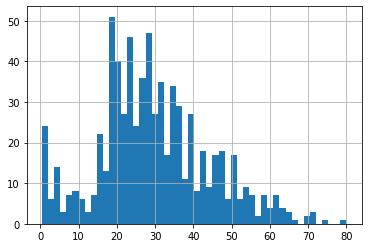

In [55]:
df["Age"].hist(bins=50)

In [56]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [60]:
df=pd.read_csv("house_train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [62]:
df.shape

(1460, 4)

In [63]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [64]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

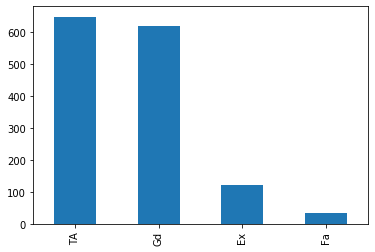

In [66]:
df["BsmtQual"].value_counts().plot.bar()

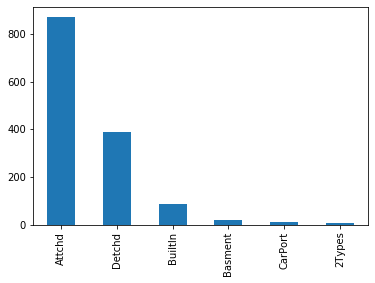

In [68]:
df["GarageType"].value_counts().plot.bar()

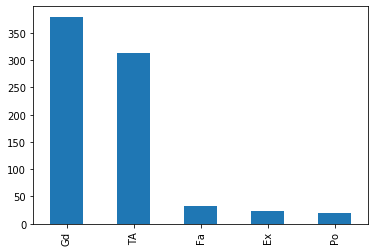

In [69]:
df["FireplaceQu"].value_counts().plot.bar()

In [72]:
def impute_nan(df,variable):
    most_freq_category=df[variable].mode()[0]
    df[variable].fillna(most_freq_category,inplace=True)

In [74]:
for feature in df.columns:
    impute_nan(df,feature)

In [75]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [86]:
df=pd.read_csv("house_train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [88]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

df["BsmtQual_Var"]=np.where(df["BsmtQual"].isnull(),1,0)
frequently=df["BsmtQual"].mode()[0]
df["BsmtQual"].fillna(frequently,inplace=True)

In [89]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_Var,BsmtQual_Var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [90]:
df=pd.read_csv("house_train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [98]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [101]:
for feature in df.columns[0:4]:
    impute_nan(df,feature)

In [102]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [103]:
df.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,208500,Gd,Missing,Attchd,208500
1,181500,Gd,TA,Attchd,181500
2,223500,Gd,TA,Attchd,223500
3,140000,TA,Gd,Detchd,140000
4,250000,Gd,TA,Attchd,250000
...,...,...,...,...,...
1455,175000,Gd,TA,Attchd,175000
1456,210000,Gd,TA,Attchd,210000
1457,266500,TA,Gd,Attchd,266500
1458,142125,TA,Missing,Attchd,142125


In [104]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


###class 4

In [110]:
import datetime as dt

In [111]:
today_date=dt.datetime.today()

In [112]:
today_date

datetime.datetime(2021, 1, 14, 15, 29, 57, 792803)

In [113]:
today_date-dt.timedelta(3)

datetime.datetime(2021, 1, 11, 15, 29, 57, 792803)

In [114]:
### List Comprehension

In [115]:
days=[today_date-dt.timedelta(x) for x in range(0,15)]

In [116]:
days

[datetime.datetime(2021, 1, 14, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 13, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 12, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 11, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 10, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 9, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 8, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 7, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 6, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 5, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 4, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 3, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 2, 15, 29, 57, 792803),
 datetime.datetime(2021, 1, 1, 15, 29, 57, 792803),
 datetime.datetime(2020, 12, 31, 15, 29, 57, 792803)]

In [121]:
data=pd.DataFrame(days)
data.columns=["Day"]

In [122]:
data.head()

,Day
0,2021-01-14 15:29:57.792803
1,2021-01-13 15:29:57.792803
2,2021-01-12 15:29:57.792803
3,2021-01-11 15:29:57.792803
4,2021-01-10 15:29:57.792803


In [123]:
data["Weekday"]=data["Day"].dt.weekday_name

In [124]:
data.head()

,Day,Weekday
0,2021-01-14 15:29:57.792803,Thursday
1,2021-01-13 15:29:57.792803,Wednesday
2,2021-01-12 15:29:57.792803,Tuesday
3,2021-01-11 15:29:57.792803,Monday
4,2021-01-10 15:29:57.792803,Sunday


In [127]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [128]:
data["Weekday_Ordinal"]=data["Weekday"].map(dictionary)

In [129]:
data.head()

,Day,Weekday,Weekday_Ordinal
0,2021-01-14 15:29:57.792803,Thursday,4
1,2021-01-13 15:29:57.792803,Wednesday,3
2,2021-01-12 15:29:57.792803,Tuesday,2
3,2021-01-11 15:29:57.792803,Monday,1
4,2021-01-10 15:29:57.792803,Sunday,7


In [130]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header= None,index_col=None)

In [131]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [132]:
columns=[1,3,5,6,7,8,9,13]

In [133]:
train_set=train_set[columns]

In [134]:
train_set.columns=["Employment","Degree","Status","Designation","Family_Job","Race","Sex","Country"]

In [135]:
train_set.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [140]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()),"labels")

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_Job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [141]:
country_map=train_set["Country"].value_counts().to_dict()

In [143]:
train_set["Country"]=train_set["Country"].map(country_map)

In [144]:
train_set.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


In [145]:
df=pd.read_csv("titanic_train.csv",usecols=["Cabin","Survived"])

In [146]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [149]:
df["Cabin"].fillna("Missing",inplace=True)
df["Cabin"]=df["Cabin"].astype(str).str[0]

In [150]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [151]:
df["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [155]:
ordinal_labels=df.groupby(["Cabin"])["Survived"].mean().sort_values().index

In [158]:
enumerate(ordinal_labels,start=0)

In [160]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [161]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [162]:
df["Cabin_ordinal_labels"]=df["Cabin"].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [163]:
mean_ordinal=df.groupby(["Cabin"])["Survived"].mean().to_dict()

In [164]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [165]:
df["mean_ordinal_encode"]=df["Cabin"].map(mean_ordinal)

In [166]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


###class 5

In [168]:
df=pd.read_csv("titanic_train.csv",usecols=["Cabin","Survived"])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [171]:
df["Cabin"].fillna("Missing",inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [174]:
df["Cabin"].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [175]:
df["Cabin"]=df["Cabin"].astype(str).str[0]

In [176]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [177]:
df["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [178]:
prob_df=df.groupby(["Cabin"])["Survived"].mean()

In [179]:
prob_df=pd.DataFrame(prob_df)

In [180]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [181]:
prob_df["Died"]=1-prob_df["Survived"]

In [182]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [183]:
prob_df["Prob_Ratio"]=prob_df["Survived"]/prob_df["Died"]
prob_df.head()

,Survived,Died,Prob_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [184]:
prob_encoded=prob_df["Prob_Ratio"].to_dict()

In [185]:
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [186]:
df["Cabin_encoded"]=df["Cabin"].map(prob_encoded)

In [187]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [188]:
df=pd.read_csv("titanic_train.csv",usecols=["Pclass","Age","Fare","Survived"])

In [189]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [190]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [191]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [192]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler=StandardScaler()

In [196]:
df_scaled=scaler.fit_transform(df)

In [198]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

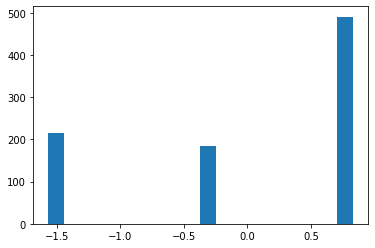

In [200]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

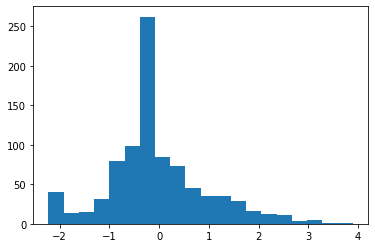

In [201]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

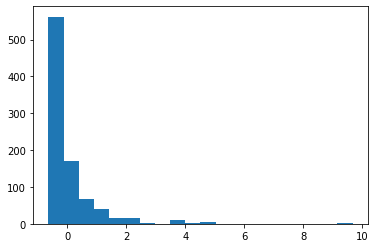

In [202]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

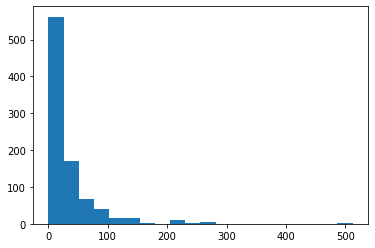

In [203]:
plt.hist(df["Fare"],bins=20)

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [206]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

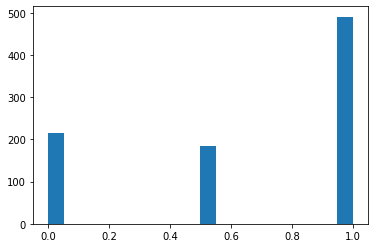

In [207]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

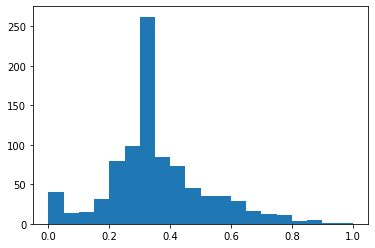

In [208]:
plt.hist(df_minmax['Age'],bins=20)


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

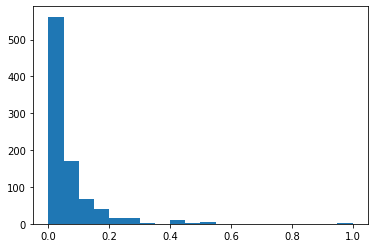

In [209]:
plt.hist(df_minmax['Fare'],bins=20)


In [210]:
from sklearn.preprocessing import RobustScaler

In [211]:
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

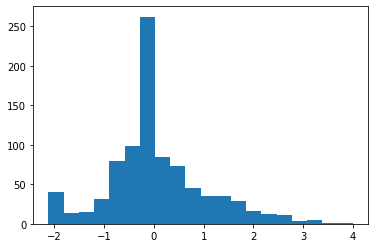

In [212]:
plt.hist(df_robust_scaler['Age'],bins=20)


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

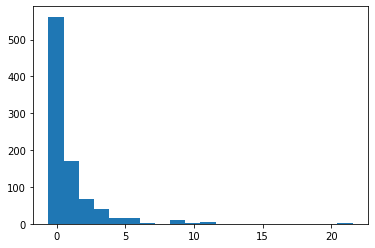

In [213]:
plt.hist(df_robust_scaler['Fare'],bins=20)


In [214]:
pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [215]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [216]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [217]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [218]:
import scipy.stats as stat
import pylab

In [225]:
### check guassian or normally distributed
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm",plot=pylab)
    plt.show()

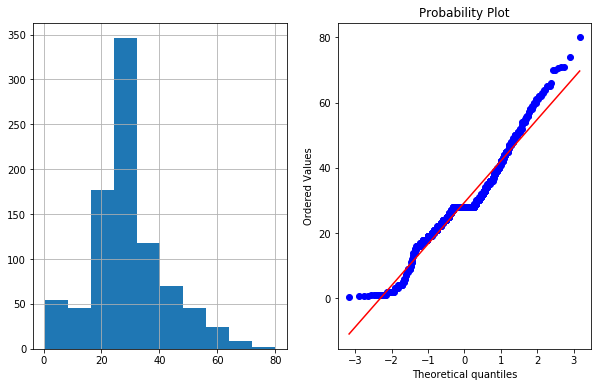

In [226]:
plot_data(df,"Age")

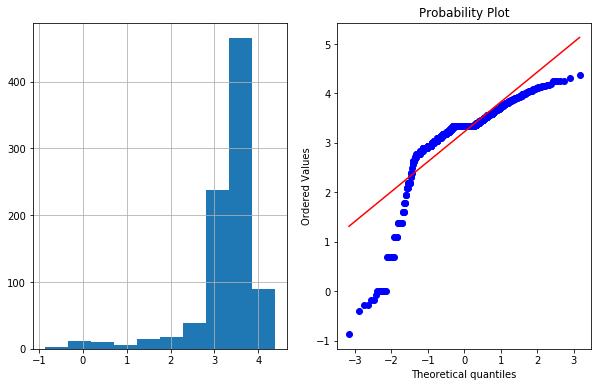

In [228]:
#LOG TRANSFORMATION
df["Age_log"]=np.log(df["Age"])
plot_data(df,"Age_log")

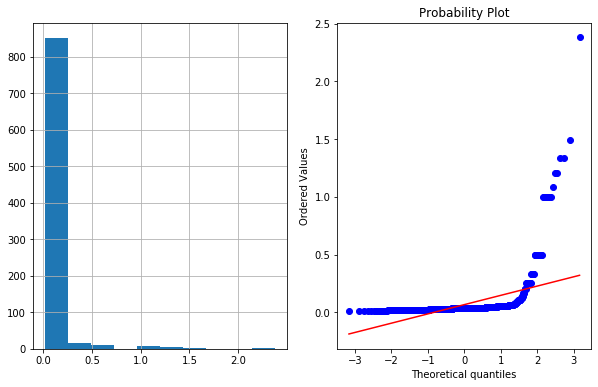

In [229]:
#RECIPROCAL TRANSFORMATION
df["Age_Reciprocal"]=1/df["Age"]
plot_data(df,"Age_Reciprocal")

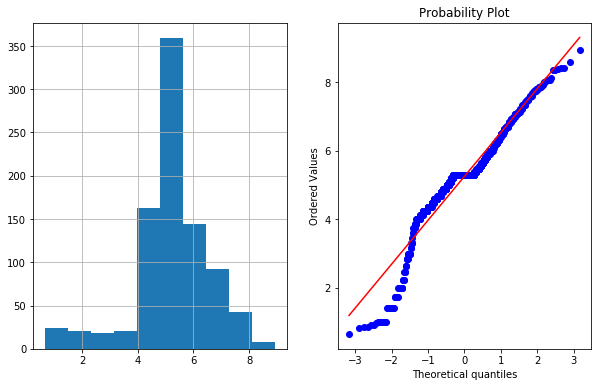

In [230]:
df["Age_Sq"]=df["Age"]**(1/2)
plot_data(df,"Age_Sq")

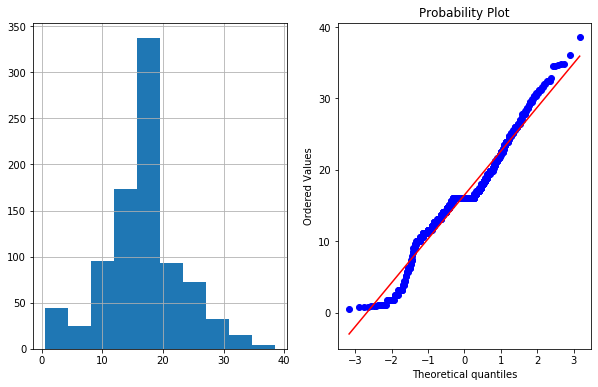

In [231]:
df["Age_exp"]=df["Age"]**(1/1.2)
plot_data(df,"Age_exp")

In [232]:
df["Age_Boxcox"],parameters=stat.boxcox(df["Age"])

In [233]:
print(parameters)

0.7964531473656952


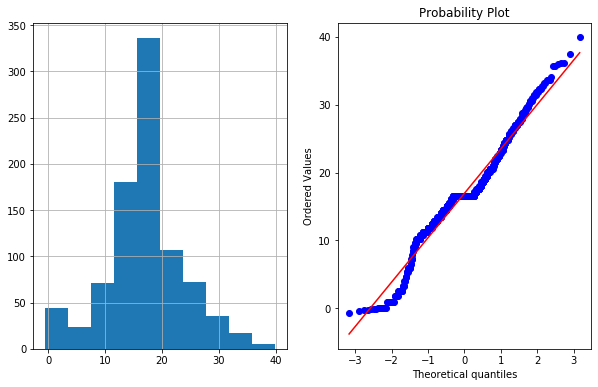

In [234]:
plot_data(df,"Age_Boxcox")

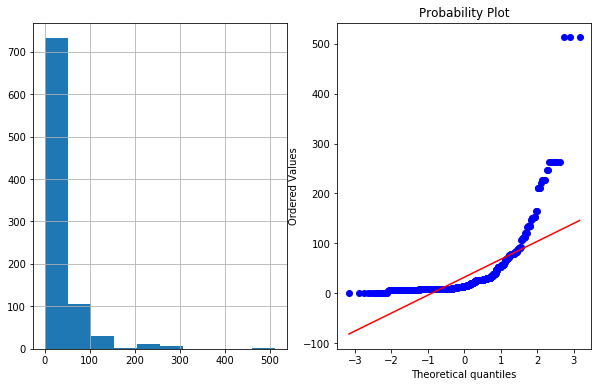

In [235]:
plot_data(df,'Fare')

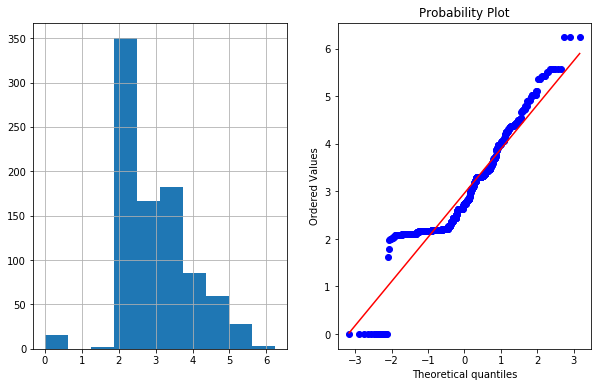

In [236]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

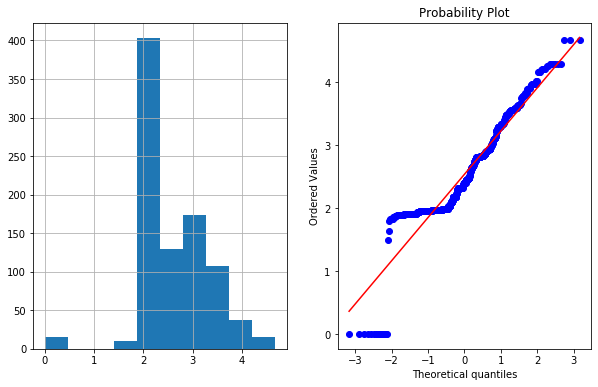

In [237]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')